In [3]:
ls /workspace/tracking_datasets/stark/sparse_exp_cnn_budget_10/checkpoints/train/stark_sparse_no_clf/baseline_got10k_only_sparse_no_clf_cnn_budget_10/

STARKST_ep0001.pth.tar  STARKST_ep0040.pth.tar  STARKST_ep0079.pth.tar
STARKST_ep0002.pth.tar  STARKST_ep0041.pth.tar  STARKST_ep0080.pth.tar
STARKST_ep0003.pth.tar  STARKST_ep0042.pth.tar  STARKST_ep0081.pth.tar
STARKST_ep0004.pth.tar  STARKST_ep0043.pth.tar  STARKST_ep0082.pth.tar
STARKST_ep0005.pth.tar  STARKST_ep0044.pth.tar  STARKST_ep0083.pth.tar
STARKST_ep0006.pth.tar  STARKST_ep0045.pth.tar  STARKST_ep0084.pth.tar
STARKST_ep0007.pth.tar  STARKST_ep0046.pth.tar  STARKST_ep0085.pth.tar
STARKST_ep0008.pth.tar  STARKST_ep0047.pth.tar  STARKST_ep0086.pth.tar
STARKST_ep0009.pth.tar  STARKST_ep0048.pth.tar  STARKST_ep0087.pth.tar
STARKST_ep0010.pth.tar  STARKST_ep0049.pth.tar  STARKST_ep0088.pth.tar
STARKST_ep0011.pth.tar  STARKST_ep0050.pth.tar  STARKST_ep0089.pth.tar
STARKST_ep0012.pth.tar  STARKST_ep0051.pth.tar  STARKST_ep0090.pth.tar
STARKST_ep0013.pth.tar  STARKST_ep0052.pth.tar  STARKST_ep0091.pth.tar
STARKST_ep0014.pth.tar  STARKST_ep0053.pth.tar  STARKST_ep0092.pth.tar
STARKS

In [ ]:
import torch
ckpt = torch.load('/workspace/tracking_datasets/stark/sparse_exp_cnn_budget_10/checkpoints/train/stark_sparse_no_clf/baseline_got10k_only_sparse_no_clf_cnn_budget_10/STARKST_ep0004.pth.tar')

In [ ]:
ckpt.keys()

In [ ]:
ckpt['net'].keys()

In [ ]:
ckpt['net']['backbone.0.body.layer1.0.bn2.weight'].shape

In [ ]:
ckpt1 = torch.load('/workspace/tracking_datasets/stark_sparse_pretrained_cnn_budget_10.pth')

In [ ]:
ckpt1['net']['backbone.0.body.layer1.0.bn2.weight'].shape

In [ ]:
for i in ckpt1['net'].keys():
    print(ckpt['net'][i].shape,"*"*10,ckpt1['net'][i].shape)

In [ ]:
ckpt1['net_type']

In [ ]:
ckpt['net_type']

In [3]:
path = '/workspace/tracking_datasets/ostrack/test/result_plots/otb/eval_data.pkl'

In [4]:
import pickle


with open(path, 'rb') as f:
    data = pickle.load(f)

In [5]:
data

{'sequences': ['Basketball',
  'Biker',
  'Bird1',
  'Bird2',
  'BlurBody',
  'BlurCar1',
  'BlurCar2',
  'BlurCar3',
  'BlurCar4',
  'BlurFace',
  'BlurOwl',
  'Board',
  'Bolt',
  'Bolt2',
  'Box',
  'Boy',
  'Car1',
  'Car2',
  'Car24',
  'Car4',
  'CarDark',
  'CarScale',
  'ClifBar',
  'Coke',
  'Couple',
  'Coupon',
  'Crossing',
  'Crowds',
  'Dancer',
  'Dancer2',
  'David',
  'David2',
  'David3',
  'Deer',
  'Diving',
  'Dog',
  'Dog1',
  'Doll',
  'DragonBaby',
  'Dudek',
  'FaceOcc1',
  'FaceOcc2',
  'Fish',
  'FleetFace',
  'Football',
  'Football1',
  'Freeman1',
  'Freeman3',
  'Freeman4',
  'Girl',
  'Girl2',
  'Gym',
  'Human2',
  'Human3',
  'Human4_2',
  'Human5',
  'Human6',
  'Human7',
  'Human8',
  'Human9',
  'Ironman',
  'Jogging_1',
  'Jogging_2',
  'Jump',
  'Jumping',
  'KiteSurf',
  'Lemming',
  'Liquor',
  'Man',
  'Matrix',
  'Mhyang',
  'MotorRolling',
  'MountainBike',
  'Panda',
  'RedTeam',
  'Rubik',
  'Shaking',
  'Singer1',
  'Singer2',
  'Skater',


In [29]:
ls lib/models/ostrack

__init__.py       ostrack.py          utils.py   vit_ce_slim.py
__pycache__/      slim_base_model.py  vit.py     vit_slim.py
base_backbone.py  slim_layers.py      vit_ce.py


In [1]:
%cd /workspace/OSTrack

/workspace/OSTrack


In [2]:
import sys
sys.path.remove("/workspace/Stark_sparse")
print(sys.path)

['/opt/conda/lib/python38.zip', '/opt/conda/lib/python3.8', '/opt/conda/lib/python3.8/lib-dynload', '', '/opt/conda/lib/python3.8/site-packages', '/opt/conda/lib/python3.8/site-packages/IPython/extensions', '/root/.ipython']


In [228]:
import os
# loss function related
from lib.utils.box_ops import giou_loss
from torch.nn.functional import l1_loss
from torch.nn import BCEWithLogitsLoss
# train pipeline related
from lib.train.trainers import LTRTrainer
# distributed training related
from torch.nn.parallel import DistributedDataParallel as DDP
# some more advanced functions
from lib.train.base_functions import *
# network related
from lib.models.ostrack import build_ostrack
# forward propagation related
from lib.train.actors import OSTrackActor
# for import modules
import importlib

from lib.utils.focal_loss import FocalLoss

import lib.train.admin.settings as ws_settings

expr_module = importlib.import_module('lib.train.train_script')
expr_func = getattr(expr_module, 'run')

settings = ws_settings.Settings()
settings.script_name = 'ostrack'
settings.config_name = 'vitb_256_mae_ce_32x4_got10k_ep100_sparse'
settings.project_path = 'train/{}/{}/{}'.format(settings.script_name, settings.config_name, 'a')
# if script_name_prv is not None and config_name_prv is not None:
#     settings.project_path_prv = 'train/{}/{}'.format(script_name_prv, config_name_prv)
settings.local_rank = -1
settings.save_dir = os.path.abspath('/')
settings.use_lmdb = 0
settings.child_train = 0
# prj_dir = os.path.abspath(os.path.join(os.path.dirname(__file__), "../.."))
# settings.cfg_file = os.path.join(prj_dir, 'experiments/%s/%s.yaml' % (script_name, config_name))
settings.use_wandb = 0
settings.cfg_file = os.path.join('experiments/ostrack/vitb_256_mae_ce_32x4_got10k_ep100_sparse.yaml' )
expr_func(settings)

New configuration is shown below.
MODEL configuration: {'PRETRAIN_FILE': '/workspace/tracking_datasets/ostrack/pretrained/OSTrack_ep0100.pth.tar', 'EXTRA_MERGER': False, 'RETURN_INTER': False, 'RETURN_STAGES': [2, 5, 8, 11], 'BACKBONE': {'TYPE': 'vit_base_patch16_224_ce', 'STRIDE': 16, 'MID_PE': False, 'SEP_SEG': False, 'CAT_MODE': 'direct', 'MERGE_LAYER': 0, 'ADD_CLS_TOKEN': False, 'CLS_TOKEN_USE_MODE': 'ignore', 'CE_LOC': [3, 6, 9], 'CE_KEEP_RATIO': [0.7, 0.7, 0.7], 'CE_TEMPLATE_RANGE': 'CTR_POINT'}, 'HEAD': {'TYPE': 'CENTER', 'NUM_CHANNELS': 256}}


TRAIN configuration: {'LR': 0.0001, 'WEIGHT_DECAY': 0.0001, 'EPOCH': 150, 'LR_DROP_EPOCH': 80, 'BATCH_SIZE': 32, 'NUM_WORKER': 10, 'OPTIMIZER': 'ADAMW', 'BACKBONE_MULTIPLIER': 0.1, 'GIOU_WEIGHT': 2.0, 'L1_WEIGHT': 5.0, 'FREEZE_LAYERS': [0], 'PRINT_INTERVAL': 50, 'VAL_EPOCH_INTERVAL': 1, 'GRAD_CLIP_NORM': 0.1, 'AMP': False, 'CE_START_EPOCH': 20, 'CE_WARM_EPOCH': 50, 'DROP_PATH_RATE': 0.1, 'SCHEDULER': {'TYPE': 'step', 'DECAY_RATE': 0.1}, 

  0%|          | 0/1875 [00:41<?, ?it/s]


Training crashed at epoch 1
Traceback for the error!
Traceback (most recent call last):
  File "/workspace/OSTrack/lib/train/trainers/base_trainer.py", line 85, in train
    self.train_epoch()
  File "/workspace/OSTrack/lib/train/trainers/ltr_trainer.py", line 205, in train_epoch
    self.cycle_dataset(loader)
  File "/workspace/OSTrack/lib/train/trainers/ltr_trainer.py", line 150, in cycle_dataset
    loss, loss1, self.sparsity_loss_attn, self.sparsity_loss_mlp, sparsity_loss_patch , stats= self.searchloss(data, self.actor)
  File "/opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py", line 744, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/workspace/OSTrack/lib/train/trainers/ltr_trainer.py", line 34, in forward
    sparsity_loss_attn, sparsity_loss_mlp, sparsity_loss_patch = actor.net.module.backbone.get_sparsity_loss(self.device)
  File "/opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py", line 795, in __getattr__
    raise ModuleAtt

In [232]:
config_module = importlib.import_module("lib.config.%s.config" % 'ostrack')
cfg = config_module.cfg
config_module.update_config_from_file(settings.cfg_file)

In [233]:
import torch
from lib.models.ostrack import build_ostrack


In [234]:
net = build_ostrack(cfg)


***** patchsize= 16 num_patches= 196 *****
Load pretrained model from: /workspace/tracking_datasets/ostrack/pretrained/OSTrack_ep0100.pth.tar


In [27]:
ckpt = torch.load('/workspace/tracking_datasets/ostrack/checkpoints/train/ostrack/vitb_384_mae_ce_32x4_got10k_ep100_sparse/w100015000075/OSTrack_ep0150.pth.tar')

In [28]:
net.load_state_dict(ckpt['net'])

<All keys matched successfully>

In [29]:
net.backbone.get_flops()

***** patchsize= 16 num_patches= 196 *****


(17524710912, 17524711424.0)

In [183]:
thresh_attn, thresh_mlp,_ = net.backbone.compress(1, 1, 0.0000000001)


In [201]:
# for i in range(12):
#     print((ckpt['net'][f'backbone.blocks.{i}.mlp.zeta']>thresh_mlp).sum(0).flatten())
attn_list = []
for i in range(12):
#     print((ckpt['net'][f'backbone.blocks.{i}.attn.zeta']>thresh_attn).sum(4).flatten())
    attn_list.append((ckpt['net'][f'backbone.blocks.{i}.attn.zeta']>thresh_attn).sum(4).flatten())

In [202]:
attn_list = torch.stack(attn_list, dim=-1).cpu().numpy()

In [203]:
import numpy as np

In [204]:
# attn_list = np.hstack((attn_list,attn_list.sum(axis=1).reshape(-1,1)))
# attn_list = np.vstack((attn_list,attn_list.sum(axis=0).reshape(1,-1)))

In [205]:
import seaborn as sns; sns.set_theme()


Text(0.5, 1.0, 'budget=1')

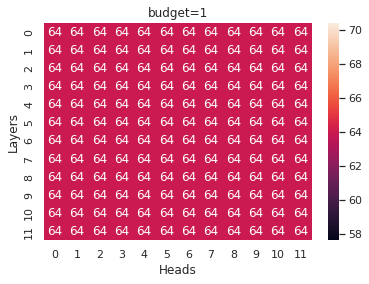

In [206]:
ax = sns.heatmap(attn_list, annot = True)
ax.set(xlabel='Heads', ylabel='Layers')
ax.set_title("budget=1")

In [172]:
ls

LICENSE         experiments/                  plots/
README.md       install.sh                    tracking/
Untitled.ipynb  lib/                          trackingnet_submit.zip
assets/         ostrack.ipynb                 wandb/
docker/         ostrack_w100015_w2000075.png


In [207]:
ax.figure.savefig('plots/384_attn_100.png')

In [218]:
budgets = [1, .75, .5, .25, .1, .01]

mlp_list = []
for b in budgets:
    thresh_attn, thresh_mlp,_ = net.backbone.compress(b, b, 0.0000000001)
    if b ==.01:
        thresh_attn, thresh_mlp,_ = net.backbone.compress_layerwise(b, b, 0.0000000001)
    a1 = []
    
    for i in range(12):
        if b==0.01:
            a1.append((ckpt['net'][f'backbone.blocks.{i}.mlp.zeta']>thresh_mlp[i]).sum().flatten())
        else:
            a1.append((ckpt['net'][f'backbone.blocks.{i}.mlp.zeta']>thresh_mlp).sum().flatten())
    mlp_list.append(torch.cat(a1))
mlp_list = torch.stack(mlp_list, dim=1).cpu().numpy()

In [219]:
mlp_list.shape

(12, 6)

[Text(0.5, 0, '1'),
 Text(1.5, 0, '0.75'),
 Text(2.5, 0, '0.5'),
 Text(3.5, 0, '0.25'),
 Text(4.5, 0, '0.1'),
 Text(5.5, 0, '0.01')]

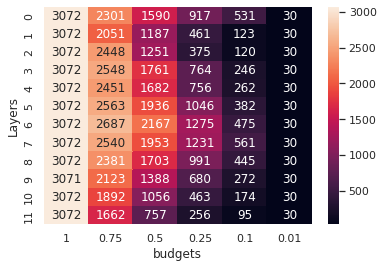

In [226]:
ax = sns.heatmap( mlp_list, fmt = 'g', annot = True)
ax.set(xlabel='budgets', ylabel='Layers')
ax.set_xticklabels(budgets)

# ax.set_title("")

In [227]:
ax.figure.savefig('plots/384_mlp_all.png')